# Multi-Class Classification

In [4]:
# Import all necessary libraries
import torch
import torchvision
from torch.utils.data import random_split
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.transforms import transforms
import numpy as np
import matplotlib.pyplot as plt
import os
import tarfile
import warnings
warnings.filterwarnings('ignore')


#Download dataset from following url: "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"

In [2]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"

download_url(dataset_url,".")

100%|██████████| 135107811/135107811 [00:03<00:00, 35684872.42it/s]


In [3]:
with tarfile.open("./cifar10.tgz","r:gz") as taz:
    taz.extractall("./data")

In [5]:
data_dir = "data/cifar10"
print(os.listdir(data_dir))
classes = os.listdir(data_dir+"/test")
classes

['test', 'train']


['deer',
 'airplane',
 'dog',
 'horse',
 'truck',
 'cat',
 'frog',
 'ship',
 'bird',
 'automobile']

In [6]:
#Image directories
for  dir_path ,dir_name,file_name in os.walk(data_dir):
    print(f"There are {len(dir_name)} directories and {len(file_name)} images in {dir_path}")


There are 2 directories and 0 images in data/cifar10
There are 10 directories and 0 images in data/cifar10/test
There are 0 directories and 1000 images in data/cifar10/test/deer
There are 0 directories and 1000 images in data/cifar10/test/airplane
There are 0 directories and 1000 images in data/cifar10/test/dog
There are 0 directories and 1000 images in data/cifar10/test/horse
There are 0 directories and 1000 images in data/cifar10/test/truck
There are 0 directories and 1000 images in data/cifar10/test/cat
There are 0 directories and 1000 images in data/cifar10/test/frog
There are 0 directories and 1000 images in data/cifar10/test/ship
There are 0 directories and 1000 images in data/cifar10/test/bird
There are 0 directories and 1000 images in data/cifar10/test/automobile
There are 10 directories and 0 images in data/cifar10/train
There are 0 directories and 5000 images in data/cifar10/train/deer
There are 0 directories and 5000 images in data/cifar10/train/airplane
There are 0 director

# Convert the file direcotry into data set

In [7]:
dataset = ImageFolder(data_dir+"/train",transform=ToTensor())
test_dataset = ImageFolder(data_dir+"/test",transform=ToTensor())

In [8]:
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

image class: bird
image length: 32
image length: 32


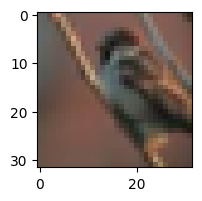

In [9]:
import random
rint = random.randint(1,50000)
img,_ = dataset[rint]
print(f"image class: {dataset.classes[_]}")
print(f"image length: {img.shape[2]}")
print(f"image length: {img.shape[1]}")
plt.figure(figsize=(2, 5))
plt.imshow(img.permute(1,2,0))


In [9]:
len(dataset)

50000

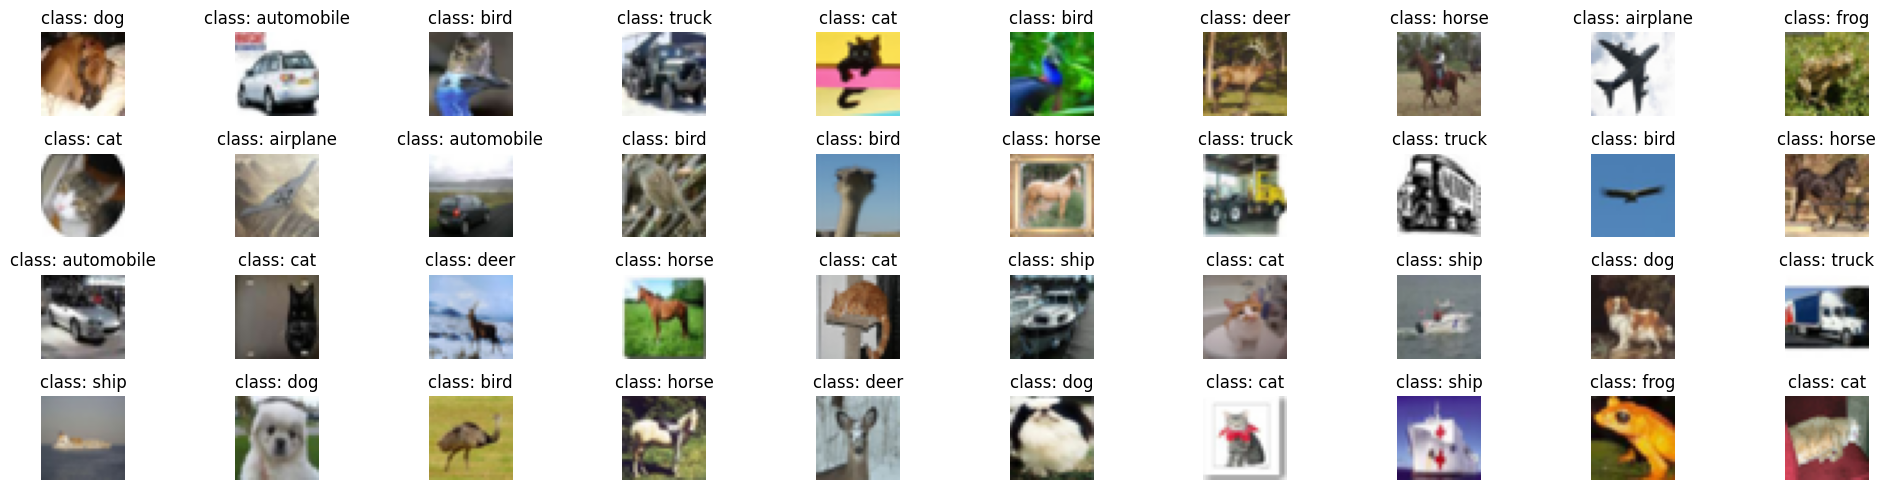

In [10]:
def draw_sample_images(data, labels = False):
    nrows = 4
    ncols = 10

    # total_image = data.shape[0]


    samples = np.random.choice(50000, nrows*ncols)

    plt.figure(figsize=(20, 5))
    for i in range(nrows*ncols):
        img,label = data[samples[i]]
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(img.permute(1,2,0))
        if labels:
            plt.title(f"class: {dataset.classes[label]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


draw_sample_images(dataset, labels = True)

In [11]:
img, label = dataset[100]
print(img.shape,label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.2902, 0.3098, 0.3216,  ..., 0.4314, 0.4392, 0.4510],
         [0.2980, 0.3176, 0.3176,  ..., 0.4353, 0.4392, 0.4549],
         [0.2980, 0.3137, 0.3216,  ..., 0.4471, 0.4549, 0.4706],
         ...,
         [0.1804, 0.1961, 0.2118,  ..., 0.2980, 0.2980, 0.2902],
         [0.1843, 0.1922, 0.1961,  ..., 0.2824, 0.2784, 0.2588],
         [0.1725, 0.1882, 0.1922,  ..., 0.2549, 0.2235, 0.2235]],

        [[0.5569, 0.5804, 0.6000,  ..., 0.7373, 0.7451, 0.7647],
         [0.5647, 0.5843, 0.5961,  ..., 0.7373, 0.7373, 0.7608],
         [0.5686, 0.5843, 0.6000,  ..., 0.7490, 0.7490, 0.7725],
         ...,
         [0.3216, 0.3451, 0.3686,  ..., 0.4588, 0.4588, 0.4588],
         [0.3294, 0.3373, 0.3490,  ..., 0.4431, 0.4392, 0.4314],
         [0.3255, 0.3412, 0.3490,  ..., 0.4196, 0.4039, 0.4157]],

        [[0.7294, 0.7451, 0.7608,  ..., 0.8392, 0.8392, 0.8549],
         [0.7255, 0.7412, 0.7529,  ..., 0.8314, 0.8314, 0.8510],
         [0.7255, 0.7373, 0.7490,  ..., 0.8392, 0.8392, 0.

In [12]:
dataset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

## Spliting the data into Training and Validation
## For validation we are using 5000 and rest for training

In [13]:
val_size = 5000
taining_size = len(dataset) - val_size

train_ds,valid_ds = random_split(dataset,[taining_size,val_size])
print(f"Training data size = {len(train_ds)}\nValidation data size {len(valid_ds)}")

Training data size = 45000
Validation data size 5000


# DataLoading the data into batche

In [14]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

In [15]:
train_dl = DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
valid_dl = DataLoader(valid_ds,batch_size*2,num_workers=4,pin_memory=True)

# Plotting the entire batch of data:

In [16]:
from torchvision.utils import make_grid

def show_grid(dl):
    for img,label in dl:
        fig,ax = plt.subplots(figsize=(12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(img,nrow=16).permute(1,2,0))
        break


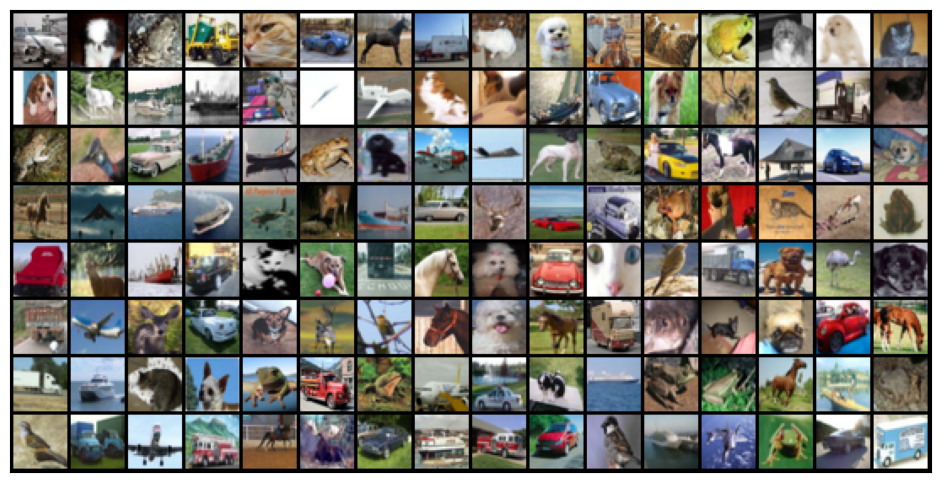

In [17]:
show_grid(train_dl)

# CNN Model Building

In [34]:
import torch.nn as nn
import torch.nn.functional as F

In [35]:
class Cifar10_classification(nn.Module):
    def __init__(self):
        super().__init__()

        self.network_arc = nn.Sequential(

            nn.Conv2d(3,32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64,128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128,128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(128,256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(256*4*4,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )

    def forward(self,xb):
        return self.network_arc(xb)

In [36]:
torch.manual_seed(42)

model_1 = Cifar10_classification()
model_1

Cifar10_classification(
  (network_arc): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Lin

In [20]:
try:
  !pip install torchinfo
except:
  import torchinfo

In [37]:
from torchinfo import summary
image,label =next(iter(train_dl))
model_1.eval()
with torch.inference_mode():
    logits = model_1(image)

print(f'image shape: {image.shape}')
print(f"pred logit: {logits}")
print(f'prediction : {torch.argmax(logits,dim=1)}')
print(f"acutal label: {label}")

image shape: torch.Size([128, 3, 32, 32])
pred logit: tensor([[-0.0109,  0.0100,  0.0265,  ..., -0.0501, -0.0224,  0.0305],
        [-0.0109,  0.0100,  0.0265,  ..., -0.0502, -0.0224,  0.0305],
        [-0.0109,  0.0099,  0.0264,  ..., -0.0501, -0.0224,  0.0304],
        ...,
        [-0.0110,  0.0099,  0.0265,  ..., -0.0501, -0.0224,  0.0305],
        [-0.0110,  0.0099,  0.0265,  ..., -0.0501, -0.0224,  0.0305],
        [-0.0109,  0.0099,  0.0265,  ..., -0.0502, -0.0225,  0.0305]])
prediction : tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9])
acutal label: tensor([1, 4, 2, 4, 1, 4, 9, 8, 6, 0, 0, 2, 6, 9, 0,

In [38]:
summary(model_1,input_size=[128,3,32,32])

Layer (type:depth-idx)                   Output Shape              Param #
Cifar10_classification                   [128, 10]                 --
├─Sequential: 1-1                        [128, 10]                 --
│    └─Conv2d: 2-1                       [128, 32, 32, 32]         896
│    └─ReLU: 2-2                         [128, 32, 32, 32]         --
│    └─Conv2d: 2-3                       [128, 64, 32, 32]         18,496
│    └─ReLU: 2-4                         [128, 64, 32, 32]         --
│    └─MaxPool2d: 2-5                    [128, 64, 16, 16]         --
│    └─Conv2d: 2-6                       [128, 128, 16, 16]        73,856
│    └─ReLU: 2-7                         [128, 128, 16, 16]        --
│    └─Conv2d: 2-8                       [128, 128, 16, 16]        147,584
│    └─ReLU: 2-9                         [128, 128, 16, 16]        --
│    └─MaxPool2d: 2-10                   [128, 128, 8, 8]          --
│    └─Conv2d: 2-11                      [128, 256, 8, 8]          295,

# Defining the **lossfunction** and **Optimizer**

In [39]:
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr = 0.001)


In [40]:
def accuracy_fun(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [42]:
def train_validation(train_dl,
                     valid_dl,
                     model_1,
                     loss_fun,
                     optimizer,
                     accuracy_fun
                    #  device="cuda"
                     ):
    train_loss, train_acc = 0,0
    valid_loss, valid_acc = 0,0


    for img , label in train_dl:

        # img , label = img.to(device), label.to(device)

        logits = model_1(img)
        loss = loss_fun(logits,label)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred = torch.argmax(logits,dim=1)
        train_acc += accuracy_fun(label,logits.argmax(dim=1))


    train_loss = train_loss/len(train_dl)
    train_acc = train_acc/len(train_dl)

    with torch.inference_mode():
        for img , label in valid_dl:
            # img , label = img.to(device), label.to(device)

            logits = model_1(img)
            loss = loss_fun(logits,label)
            valid_loss += loss
            y_pred = torch.argmax(logits,dim=1)
            valid_acc += accuracy_fun(label,logits.argmax(dim=1))

    valid_loss = valid_loss/len(valid_dl)
    valid_acc = valid_acc/len(valid_dl)

    print(f"\nTrain loss :{train_loss} | Train accurracy: {train_acc}")
    print(f"Validation loss :{valid_loss} | validation accurracy: {valid_acc}")

    return train_loss,train_acc,valid_loss,valid_acc




In [44]:
from tqdm import tqdm
epoch = 10

def result(training_dl,validation_dl,model,loss_fun,optimizer,accuracy_fun):
    # Function to set the proper device
    def get_default_device():
      """Pick GPU if available, else CPU"""
      if torch.cuda.is_available():
          return torch.device('cuda')
      else:
          return torch.device('cpu')
    # changing the device type of data and model
    def to_device(data, device):
        """Move tensor(s) to chosen device"""
        if isinstance(data, (list,tuple)):
            return [to_device(x, device) for x in data]
        return data.to(device, non_blocking=True)

    class DeviceDataLoader():
        """Wrap a dataloader to move data to a device"""
        def __init__(self, dl, device):
            self.dl = dl
            self.device = device

        def __iter__(self):
            """Yield a batch of data after moving it to device"""
            for b in self.dl:
                yield to_device(b, self.device)

        def __len__(self):
            """Number of batches"""
            return len(self.dl)

    # device = get_default_device()
    device = get_default_device()

    #shifting the data and model to device
    training_dl = DeviceDataLoader(training_dl, device)
    validation_dl = DeviceDataLoader(validation_dl, device)
    to_device(model, device);

    result = {"train_loss":[],
            "train_acc" :[],
            "valid_loss":[],
            "valid_acc":[]}

    train_dl = training_dl
    valid_dl = validation_dl
    model_1 = model
    loss_fun = loss_fun
    optimizer = optimizer
    accuracy_fun = accuracy_fun

    for ep in tqdm(range(epoch)):


      train_loss,train_acc,valid_loss,valid_acc = train_validation(train_dl,
                                                                    valid_dl,
                                                                    model_1,
                                                                    loss_fun,
                                                                    optimizer,
                                                                    accuracy_fun
                                                                    )

      result["train_acc"].append(train_acc)
      result["train_loss"].append(train_loss)
      result["valid_acc"].append(valid_acc)
      result["valid_loss"].append(valid_loss)

    return result


In [45]:
model_1_results = result(train_dl,valid_dl,model_1,loss_fun,optimizer,accuracy_fun)

 10%|█         | 1/10 [00:16<02:26, 16.32s/it]


Train loss :1.818184494972229 | Train accurracy: 30.78859887941919
Validation loss :1.5142605304718018 | validation accurracy: 42.83892463235294


 20%|██        | 2/10 [00:32<02:09, 16.22s/it]


Train loss :1.3330787420272827 | Train accurracy: 50.72748974116162
Validation loss :1.1509332656860352 | validation accurracy: 58.50068933823529


 30%|███       | 3/10 [00:48<01:53, 16.20s/it]


Train loss :1.0395303964614868 | Train accurracy: 62.636373500631315
Validation loss :0.9238219261169434 | validation accurracy: 66.92670036764706


 40%|████      | 4/10 [01:05<01:38, 16.44s/it]


Train loss :0.8389386534690857 | Train accurracy: 70.1571377840909
Validation loss :0.9063227772712708 | validation accurracy: 68.69255514705883


 50%|█████     | 5/10 [01:22<01:22, 16.59s/it]


Train loss :0.6803731918334961 | Train accurracy: 75.97804214015152
Validation loss :0.7476946711540222 | validation accurracy: 74.59443933823529


 60%|██████    | 6/10 [01:38<01:05, 16.42s/it]


Train loss :0.5571855306625366 | Train accurracy: 80.08848248106061
Validation loss :0.704523503780365 | validation accurracy: 75.59512867647058


 70%|███████   | 7/10 [01:54<00:49, 16.34s/it]


Train loss :0.4347238540649414 | Train accurracy: 84.72666114267678
Validation loss :0.6934730410575867 | validation accurracy: 77.29779411764706


 80%|████████  | 8/10 [02:10<00:32, 16.25s/it]


Train loss :0.3418993353843689 | Train accurracy: 87.84204348169192
Validation loss :0.7616692781448364 | validation accurracy: 76.796875


 90%|█████████ | 9/10 [02:27<00:16, 16.51s/it]


Train loss :0.2535243630409241 | Train accurracy: 91.07555042613636
Validation loss :0.8727065920829773 | validation accurracy: 76.65670955882352


100%|██████████| 10/10 [02:44<00:00, 16.41s/it]


Train loss :0.19054412841796875 | Train accurracy: 93.38798137626263
Validation loss :0.8898243308067322 | validation accurracy: 77.18979779411765


In [46]:
model_1_results

{'train_loss': [tensor(1.8182, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.3331, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.0395, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8389, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.6804, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5572, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.4347, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.3419, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.2535, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.1905, device='cuda:0', grad_fn=<DivBackward0>)],
 'train_acc': [30.78859887941919,
  50.72748974116162,
  62.636373500631315,
  70.1571377840909,
  75.97804214015152,
  80.08848248106061,
  84.72666114267678,
  87.84204348169192,
  91.07555042613636,
  93.38798137626263],
 'valid_loss': [tensor(1.5143, device='cuda:0'),
  tensor(1.1509, device='cuda:0'),
  tensor(0.9238, device='cuda:0'),
  tensor(0.9063, device='cuda:0'),
  tensor(0.7477, 

In [47]:
from typing import Tuple,Dict,List
def plotting(results: Dict[str, List[float]]):

  loss = torch.tensor(results["train_loss"])
  acc = torch.tensor(results['train_acc'])
  test_loss = torch.tensor(results['valid_loss'])
  test_acc = torch.tensor(results['valid_acc'])

  epoch = range(len(results['train_loss']))

  fig = plt.figure(figsize = (15,7))

  plt.subplot(1,2,1)
  plt.plot(epoch,loss,label="train_loss")
  plt.plot(epoch,test_loss,label = "valid_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epoch,acc,label="train_accuracy")
  plt.plot(epoch,test_acc,label="valid_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epoch")
  plt.legend()

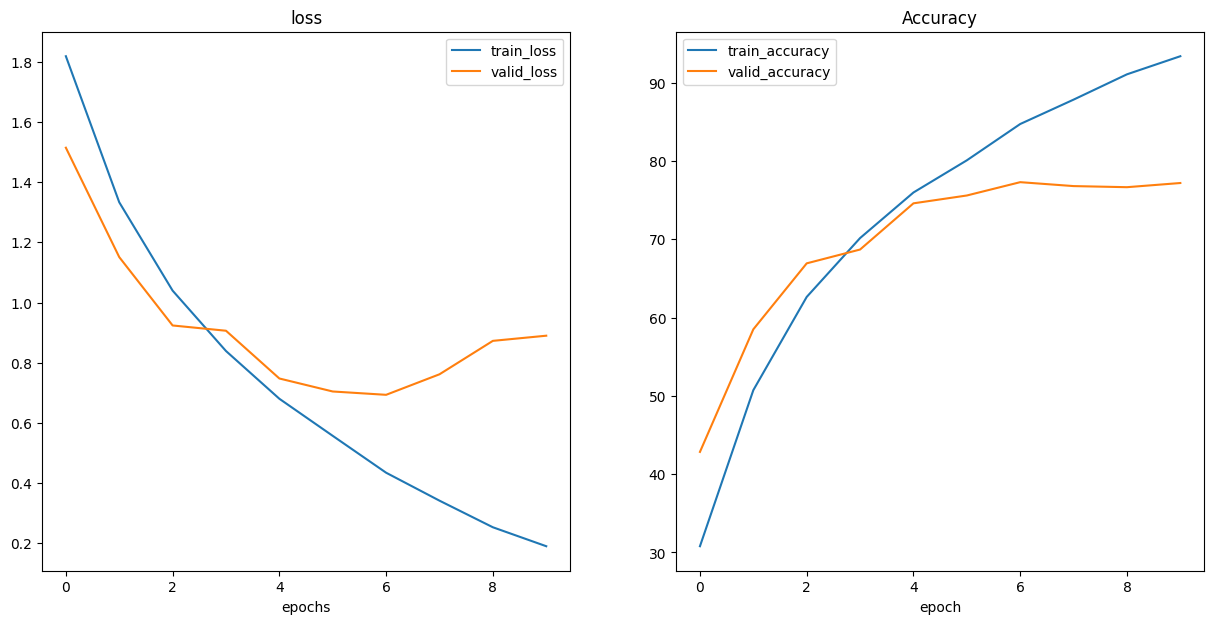

In [48]:
plotting(model_1_results)

In [49]:
import pandas as pd
model_1_results = {key:torch.tensor(value) for key,value in model_1_results.items()}
pd.DataFrame(model_1_results)

,train_loss,train_acc,valid_loss,valid_acc
0,1.818184,30.788599,1.514261,42.838924
1,1.333079,50.727489,1.150933,58.500690
2,1.039530,62.636372,0.923822,66.926697
3,0.838939,70.157135,0.906323,68.692558
4,0.680373,75.978043,0.747695,74.594437
5,0.557186,80.088486,0.704524,75.595131
6,0.434724,84.726662,0.693473,77.297791
7,0.341899,87.842041,0.761669,76.796875
8,0.253524,91.075554,0.872707,76.656708
9,0.190544,93.387978,0.889824,77.189796


In [50]:
def to_device(data, device):
        """Move tensor(s) to chosen device"""
        if isinstance(data, (list,tuple)):
            return [to_device(x, device) for x in data]
        return data.to(device, non_blocking=True)

In [51]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device=torch.device("cuda"))
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: bird , Predicted: bird


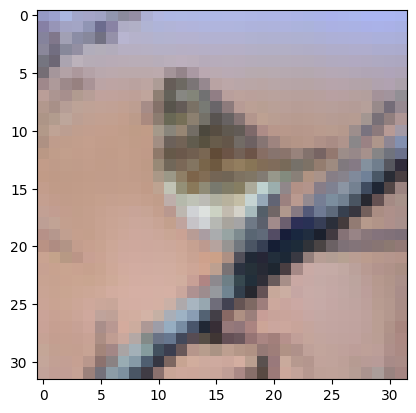

In [52]:
img, label = test_dataset[2011]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_1))

# Dealing with problem of overfitting:

*   Data Augumentation
*   Regularization
*   Dropout layers
*   Batch Normalization
*   k-fold Cross validatoin







# Data Augumentation:
Data augmentation involves creating additional training data from your existing data by applying random transformations. This helps the model generalize better.





In [53]:
transformation = transforms.Compose([
    transforms.RandomCrop(32,padding=4,padding_mode='reflect'),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

dataset_new = ImageFolder(data_dir+"/train")
val_size = 5000
taining_size = len(dataset_new) - val_size
train_ds,valid_ds = random_split(dataset_new,[taining_size,val_size])
train_ds.dataset.transform = transformation
valid_ds.dataset.transform = ToTensor()

new_train_dl = DataLoader(train_ds,batch_size=128 ,shuffle=True,pin_memory=True,num_workers=4)
new_valid_dl = DataLoader(valid_ds,batch_size=128*2,pin_memory=True,num_workers=4)

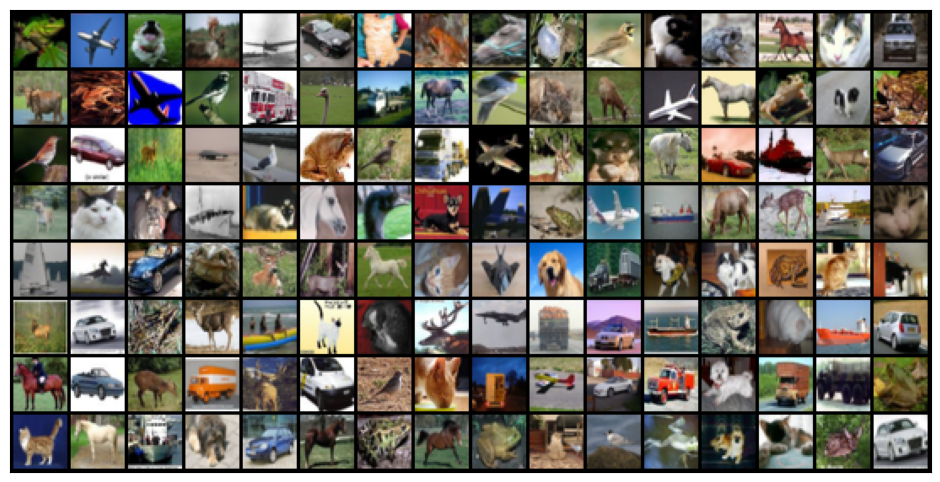

In [54]:
image,label = next(iter(new_train_dl))
show_grid(new_train_dl)

# Batch_Normalization and Dropout:
## Batch_Normalization:

Batch normalization normalizes the inputs to each layer, which can stabilize learning and reduce overfitting

## Dropout:
Dropout randomly zeroes out a fraction of activations during training, which helps prevent the network from relying too heavily on any particular activation.

In [73]:
# @title New_model to deal with overfitting
class Cifar10_classification_2(nn.Module):
    def __init__(self):
        super().__init__()

        self.network_arc = nn.Sequential(

            nn.Conv2d(3,32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size=3,stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64,128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(128,256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(256*4*4,1024),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.Linear(512,10)
        )

    def forward(self,xb):
        return self.network_arc(xb)

In [77]:
model_2 = Cifar10_classification_2()
model_2

Cifar10_classification_2(
  (network_arc): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), st

In [63]:
summary(model_2,input_size=[128,3,32,32])

Layer (type:depth-idx)                   Output Shape              Param #
Cifar10_classification_2                 [128, 10]                 --
├─Sequential: 1-1                        [128, 10]                 --
│    └─Conv2d: 2-1                       [128, 32, 32, 32]         896
│    └─BatchNorm2d: 2-2                  [128, 32, 32, 32]         64
│    └─ReLU: 2-3                         [128, 32, 32, 32]         --
│    └─Conv2d: 2-4                       [128, 64, 32, 32]         18,496
│    └─BatchNorm2d: 2-5                  [128, 64, 32, 32]         128
│    └─ReLU: 2-6                         [128, 64, 32, 32]         --
│    └─MaxPool2d: 2-7                    [128, 64, 16, 16]         --
│    └─Conv2d: 2-8                       [128, 128, 16, 16]        73,856
│    └─BatchNorm2d: 2-9                  [128, 128, 16, 16]        256
│    └─ReLU: 2-10                        [128, 128, 16, 16]        --
│    └─Conv2d: 2-11                      [128, 128, 16, 16]        147,584

# Regularization:
L2 Regularization (Weight Decay)

L2 regularization penalizes large weights in the model by adding a term to the loss function.

In [78]:
optimizer = torch.optim.Adam(model_2.parameters(), lr = 0.001,weight_decay=0.001)

# K-fold cross validation
Instead of relying on a single train/validation split, use K-fold cross-validation to evaluate your model. This technique can give a more reliable estimate of model performance.



In [ ]:
# from sklearn.model_selection import KFold

# # Split data using K-fold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# for train_index, val_index in kf.split(dataset):
#     train_subset = torch.utils.data.Subset(dataset, train_index)
#     val_subset = torch.utils.data.Subset(dataset, val_index)

#     train_loader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
#     val_loader = torch.utils.data.DataLoader(val_subset, batch_size=32)

#     # Train and evaluate model on each fold
#     train(model, train_loader)
#     evaluate(model, val_loader)


#Early Stopping:
Stop training when the validation loss stops improving to prevent the model from overfitting the training data.

In [79]:
# # Example pseudo-code for early stopping
# best_val_loss = float('inf')
# patience, num_bad_epochs = 5, 0

# for epoch in range(num_epochs):
#     train(model, train_loader)
#     val_loss = evaluate(model, val_loader)

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         num_bad_epochs = 0
#         # Save model checkpoint
#         torch.save(model.state_dict(), 'best_model.pth')
#     else:
#         num_bad_epochs += 1
#         if num_bad_epochs >= patience:
#             print("Early stopping")
#             break


# For maximum accuraccy run it for 14-15 epoch

In [80]:
result_2 = result(new_train_dl,new_valid_dl,model_2,loss_fun,optimizer,accuracy_fun)

 10%|█         | 1/10 [00:17<02:36, 17.42s/it]


Train loss :1.5634291172027588 | Train accurracy: 42.03682331123737
Validation loss :1.2728039026260376 | validation accurracy: 53.87063419117648


 20%|██        | 2/10 [00:35<02:24, 18.09s/it]


Train loss :1.1129038333892822 | Train accurracy: 60.59718276515151
Validation loss :0.9948415756225586 | validation accurracy: 64.71966911764706


 30%|███       | 3/10 [00:53<02:05, 17.94s/it]


Train loss :0.9252815246582031 | Train accurracy: 67.78009588068181
Validation loss :0.8648358583450317 | validation accurracy: 70.71461397058823


 40%|████      | 4/10 [01:11<01:47, 17.87s/it]


Train loss :0.8025935888290405 | Train accurracy: 72.91025489267678
Validation loss :0.7716600894927979 | validation accurracy: 73.99586397058823


 50%|█████     | 5/10 [01:29<01:29, 17.87s/it]


Train loss :0.6992434859275818 | Train accurracy: 76.47544783775253
Validation loss :0.7514528632164001 | validation accurracy: 76.07651654411765


 60%|██████    | 6/10 [01:49<01:13, 18.47s/it]


Train loss :0.6283953189849854 | Train accurracy: 79.05668008207071
Validation loss :0.645472526550293 | validation accurracy: 79.15556066176471


 70%|███████   | 7/10 [02:06<00:54, 18.26s/it]


Train loss :0.5649172067642212 | Train accurracy: 81.44062697285354
Validation loss :0.6815878748893738 | validation accurracy: 78.18474264705883


 80%|████████  | 8/10 [02:24<00:36, 18.04s/it]


Train loss :0.5106855630874634 | Train accurracy: 83.29683554292929
Validation loss :0.5797225832939148 | validation accurracy: 81.40280330882352


 90%|█████████ | 9/10 [02:41<00:17, 17.89s/it]


Train loss :0.4671727120876312 | Train accurracy: 84.75058199179293
Validation loss :0.5875667929649353 | validation accurracy: 81.91865808823529


100%|██████████| 10/10 [03:01<00:00, 18.12s/it]


Train loss :0.4289132058620453 | Train accurracy: 85.9836154513889
Validation loss :0.5357221364974976 | validation accurracy: 83.57421875


In [81]:
result_2

{'train_loss': [tensor(1.5634, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(1.1129, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.9253, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.8026, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.6992, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.6284, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5649, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.5107, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.4672, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(0.4289, device='cuda:0', grad_fn=<DivBackward0>)],
 'train_acc': [42.03682331123737,
  60.59718276515151,
  67.78009588068181,
  72.91025489267678,
  76.47544783775253,
  79.05668008207071,
  81.44062697285354,
  83.29683554292929,
  84.75058199179293,
  85.9836154513889],
 'valid_loss': [tensor(1.2728, device='cuda:0'),
  tensor(0.9948, device='cuda:0'),
  tensor(0.8648, device='cuda:0'),
  tensor(0.7717, device='cuda:0'),
  tensor(0.7515, d

In [82]:
import pandas as pd
result_2 = {key: torch.tensor(value) for  key,value in result_2.items()}
pd.DataFrame(result_2)

,train_loss,train_acc,valid_loss,valid_acc
0,1.563429,42.036823,1.272804,53.870636
1,1.112904,60.597183,0.994842,64.719666
2,0.925282,67.780098,0.864836,70.714615
3,0.802594,72.910255,0.771660,73.995865
4,0.699243,76.475449,0.751453,76.076515
5,0.628395,79.056679,0.645473,79.155563
6,0.564917,81.440628,0.681588,78.184746
7,0.510686,83.296837,0.579723,81.402802
8,0.467173,84.750580,0.587567,81.918655
9,0.428913,85.983612,0.535722,83.574219


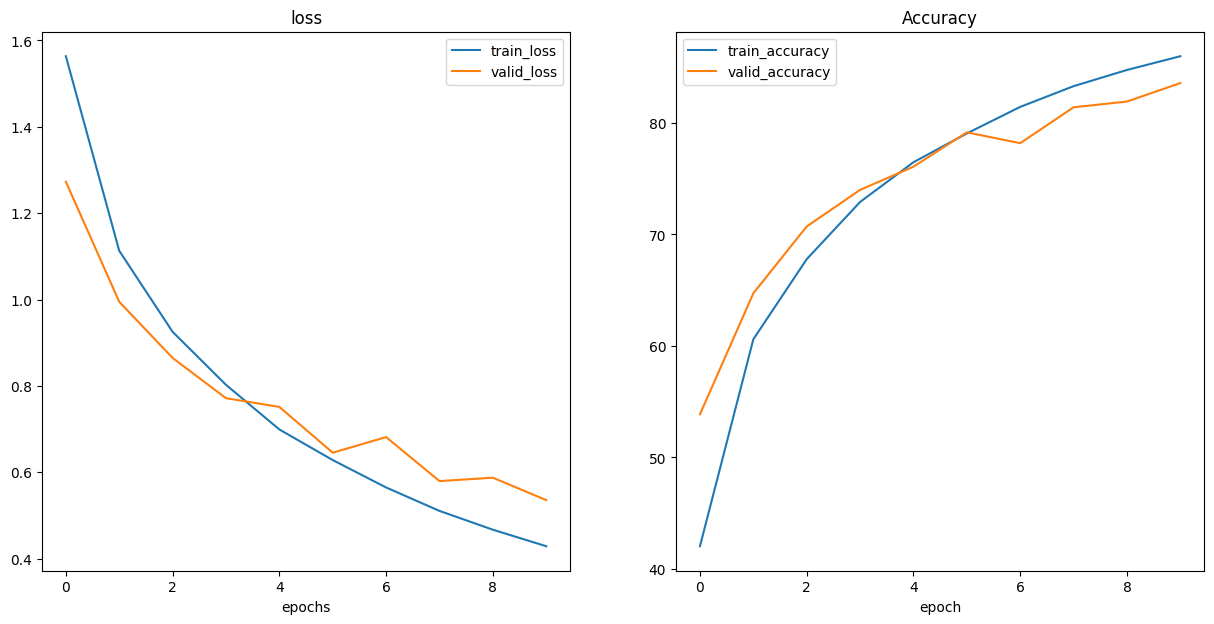

In [83]:
plotting(result_2)

In [86]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device=torch.device("cuda"))
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: deer , Predicted: deer


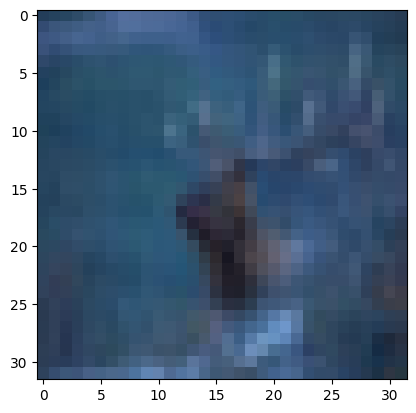

In [87]:
img, label = test_dataset[4000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_2))